<a href="https://colab.research.google.com/github/i-malur/programaria-analise-de-dados-com-python/blob/main/Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arquivos usados
* https://docs.google.com/spreadsheets/d/1o5FTAMpTjSuc6AzJneVJCUwVvHFTF81e/edit?usp=sharing&ouid=110757349929697289660&rtpof=true&sd=true - planilha de dados
* https://drive.google.com/file/d/10LCDXf0g7XwXjIi6_tMidWC9QMgOTdBn/view?usp=sharing - banco de dados (dbeaver)
* https://drive.google.com/file/d/1ZSlztzB15cqFw3B3exV_KuJ542tNKAz5/view?usp=sharing - arquivo csv


# Introdução
Aprendemos sobre as bibliotecas, utilização de funções, agrupamento de colunas, estatística, media, moda e mediana, distribuição amostral e intervalo de confiança, correlação, tabela dinâmica, valores faltantes, valores descrepantes, featuring engeneering, agrupamento de tabelas, criação de colunas e adaptação de dados utilizando lambda e a função apply().

### Palavras chaves

* str => O método str.contains() verifica se cada valor da coluna indicada possui uma substring específica
```dados['OUTRA'] = dados['COR/RACA/ETNIA'].str.contains('Outra|Prefiro não informar', case=False) | dados['OUTRA'].value_counts()```


# Importações

In [ ]:
# todas as importações
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # usada para dividir o dado em pequenos grupos para a média desses grupos. A diferença entre médias é o erro padrão
from scipy.stats import chi2_contingency

# Aula 3.4 - uso da biblioteca pandas

## [Tipo de dados](https://escoladedados.org/tutoriais/o-que-sao-dados/#:~:text=No%20geral%2C%20os%20dados%20podem,%2C%20nomes%2C%20g%C3%AAnero%2C%20etc.)
1. Qualitativos
2. Quantitativos
3. Categóricos

## Biblioteca Pandas

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lendo o arquivo excel alocada no drive

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria - Dados/planilha_modulo3.xlsx')
dados

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


## Dados.head()

dados.head()  - Sempre demonstra 5 primeiras linhas do excel

In [ ]:
dados.head()

Para ver outras linhas, basta declarar a quantidade desejada

In [ ]:
dados.head(10)

## dados.tail()

Para ver as últimas 5 linhas

In [ ]:
dados.tail()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


Para ver outras linhas, basta declarar a quantidade desejada

In [ ]:
dados.tail(10)

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4263,4263,02ido3x5siue5if02iz2taqjmcnh58xh,26.0,25-29,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,6641.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0
4265,4265,01nmlhyw8w2b4stchg01nmlvlcqp0iis,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Marketing,de 1 a 5,0.0,NaN,Analista de Marketing,Pleno,de R$ 2.001/mês a R$ 3.000/mês,de 3 a 4 anos,de 1 a 2 anos,2348.0
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


## Index

Os números da primeira coluna da tabela são os **index**. Podem ser números ou textos e não precisa ser ordenado.
Por padrão, o index é a contagem de linhas em ordem. A contagem em python sempre inicia em **0**.

## Shape

Usando dados.shape podemos verificar o tamanho da planilha. Ele é um atributo com valor que retorna o tamanho da tabela em linhas x colunas.

In [ ]:
dados.shape

(4271, 29)

## len()

Para descobrir quantas linhas a tabela possui.

In [ ]:
len(dados)

4271

## Dados.columns

Para descobrir quais são as colunas da tabela

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

## dados.info()

Informações gerais da tabela

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

## dados.describe()
Retorna as colunas com valores numéricos


In [ ]:
dados.describe()

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


# Aula 3.5

### Filtrando coluna gênero por gênero feminino
1. Pegando os dados da coluna GÊNERO, onde a informação está como 'Feminino'

In [ ]:
dados[dados['GENERO'] == 'Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


Filtrando a coluna GÊNERO, onde a infomação é diferente de 'Masculino'

In [ ]:
dados[dados['GENERO'] != 'Masculino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


str.contains()

Filtrando a busca onde tenha a palavra 'não'. Além disso, definimos na=False ou seja, valores nulos são falsos.

In [ ]:
dados[dados['GENERO'].str.contains('não', na=False)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


Filtrando dados da tabela "IDADE" onde o valor da idade é maior que 25.

In [ ]:
dados[dados['IDADE'] >= 25]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0
4265,4265,01nmlhyw8w2b4stchg01nmlvlcqp0iis,28.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Marketing,de 1 a 5,0.0,NaN,Analista de Marketing,Pleno,de R$ 2.001/mês a R$ 3.000/mês,de 3 a 4 anos,de 1 a 2 anos,2348.0
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0


Filtrando dados com duas condições, utilizando o '&' para buscar idade >= 25 E genero = feminino.

In [ ]:
dados[(dados['IDADE'] >= 25) & (dados['GENERO'] == 'Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


Filtrando dados com duas condições, utilizando o '|' para buscar idade >= 30 OU genero = feminino.

In [ ]:
dados[(dados['IDADE'] >= 30) | (dados['GENERO'] == 'Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


# Planilha licitações  - Atividade aula 3.5

In [ ]:
licitacoes = pd.read_excel('/content/drive/MyDrive/Programaria - Dados/licitacoes.xlsx')

In [ ]:
encerrado = licitacoes[licitacoes['Situação Licitação'] == 'Encerrado']

# usando len e shape para descobrir quantas linhas a tabela possui após ser filtrada
print(len(encerrado))
numero_de_linhas = encerrado.shape[0]
numero_de_linhas

9016


9016

### Atividade - unidade 4

In [ ]:
#valores nulos no dataframe licitacoes

valor_nulo = licitacoes.isnull().sum()
valor_nulo

,0
Número Licitação,0
Código UG,0
Nome UG,0
Código Modalidade Compra,0
Modalidade Compra,0
Número Processo,0
Objeto,0
Situação Licitação,0
Código Órgão Superior,0
Nome Órgão Superior,0


In [ ]:
data_padrao = pd.to_datetime('2023-01-01')
licitacoes['Data Abertura'].fillna(data_padrao, inplace=True)

print(licitacoes['Data Abertura'])


0       2016-08-17
1       2024-01-01
2       2024-01-01
3       2018-11-30
4       2024-01-01
           ...    
15331   2018-11-26
15332   2024-01-01
15333   2024-01-01
15334   2024-01-01
15335   2024-01-01
Name: Data Abertura, Length: 15336, dtype: datetime64[ns]


# Aula 3.5 parte 02


Agrupando por genero e somando quantos IDs únicos temos em cada gênero (assumindo que cada pessoa que fez a pesquisa possui um id próprio)

In [ ]:
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


Usando o dropna para adicionar valores nulos  
dropna=True -> retira valores nulos  
dropna=False -> implementa esses valores  
Por padrão, o dropna é True.

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


Usando o value_counts() para contar as ocorrências utilizando as informações da coluna 'genero'

In [ ]:
dados['GENERO'].value_counts(dropna=False)

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


Filtrando a quantidade de pessoas por nível com idade maior ou igual a 30 anos.

In [ ]:
dados[dados['IDADE'] >=30]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,591
Pleno,484
Júnior,311


Filtrando a quantidade de mulheres por nível com idade maior ou igual a 30 anos.

In [ ]:
dados[(dados['IDADE'] >=30) & (dados['GENERO'] == 'Feminino')]['NIVEL'].value_counts()

,count
NIVEL,
Pleno,139
Sênior,123
Júnior,110


Tabela dinâmica - piot_table()   
aggfunc - Usado para definir a função que vamos usar na tabela dinâmica.

In [ ]:
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'],  aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Aula 4.1 - Estatísticas

* Média
* Média ponderada
* Mediana
* Moda
* Desvio padrão: diz o quão longe ou o quão disperso os dados estão em relação a média. A função diz o quanto os dados são homogênios ou se tem muitas variações. Quanto mais próximo do 0 o desvio for, mais uniforme os dados estão.

## Média de uma lista com idades diferentes

In [ ]:
lista_idades = [10, 25, 67, 89, 45, 32, 18, 19, 27, 48, 14]

In [ ]:
np.sum(lista_idades)

394

In [ ]:
len(lista_idades)

11

In [ ]:
np.sum(lista_idades) / len(lista_idades)

35.81818181818182

In [ ]:
media_idades = np.mean(lista_idades)
print('Média aritmética: ',media_idades)

Média aritmética:  35.81818181818182


In [ ]:
lista_idades.sort()
lista_idades

[10, 14, 18, 19, 25, 27, 32, 45, 48, 67, 89]

In [ ]:
lista_idades = [10, 25, 67, 89, 45, 32, 18, 19, 27, 48, 14, 100]
lista_idades.sort()
lista_idades

[10, 14, 18, 19, 25, 27, 32, 45, 48, 67, 89, 100]

In [ ]:
mediana = np.median(lista_idades)
print('Mediana: ',mediana)

Mediana:  29.5


Calculando a coluna de idade da tabela

In [ ]:
dados['IDADE'].mean() # média

31.169168453657374

In [ ]:
dados['IDADE'].median() # mediana

30.0

In [ ]:
dados['IDADE'].mode() # moda

,IDADE
0,27.0


In [ ]:
dados['IDADE'].std() # desvio padrão

6.902802832143122

In [ ]:
dados['IDADE'].min() # mínimo

18.0

In [ ]:
dados['IDADE'].max() # máximo

54.0

In [ ]:
media_mulheres = dados[dados['GENERO']== 'Feminino'] ['IDADE'].mean()
media_mulheres


31.318051575931232

In [ ]:
media_homens = dados[dados['GENERO']== 'Masculino'] ['IDADE'].mean()
media_homens

31.147876077930373

In [ ]:
media_homens_salario = dados[dados['GENERO']== 'Masculino'] ['SALARIO'].mean()
media_homens_salario

11724.552688172043

In [ ]:
media_mulheres_salario = dados[dados['GENERO']== 'Feminino'] ['SALARIO'].mean()
media_mulheres_salario

8673.22460496614

Atividade média/mediana/moda/desvio padrão

In [ ]:
dados['IDADE'].mean()

31.169168453657374

In [ ]:
dados['IDADE'].median()

30.0

In [ ]:
dados['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
dados['IDADE'].std()

6.902802832143122

In [ ]:
dados['IDADE'].min()

18.0

In [ ]:
dados['IDADE'].max()

54.0

In [ ]:
dados[dados['GENERO'] == 'Feminino']['IDADE'].mean()

31.318051575931232

# Aula 4.2 - Valores faltantes


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

### Trabalhando coluna de gênero

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
# Preenchendo os valores nulos
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Trabalhando na coluna idade

In [ ]:
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


Para a coluna "IDADE", vimos que temos uma coluna que podemos usar de auxílio para preencher os nulos. Então substituímos os valores nulos pela média das idades na faixa etária correspondente. Por exemplo, a média da faixa 17-21 é usada para preencher esses valores nulos.

Já na faixa +55 não tivemos nenhum dado preenchido e por isso usamos a média geral das idades. Um ponto importante é que se fosse em um dia-a-dia no trabalho discutiríamos com o time de trabalho para verificar possíveis erros de formulário.

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
media17_21 = dados[dados['FAIXA IDADE'] =='17-21']['IDADE'].mean()
media17_21

20.205479452054796

In [ ]:
# função loc para localizar valores nulos na "FAIXA IDADE" e 'IDADE' e atribuindo na 'IDADE' a média de idade
dados.loc[(dados['FAIXA IDADE'] =='17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media17_21

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


In [ ]:
# buscando a idade da faixa de idade +55
dados[dados['FAIXA IDADE'] =='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
dados[dados['FAIXA IDADE'] =='55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
media_geral = dados['IDADE'].mean()
media_geral

31.153517220250375

In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+')& (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


### Tratando coluna Salário

Agora, para a coluna "SALARIO", com 577 valores nulos e sem informações na coluna de Faixa salarial, usamos a mediana para preencher, pois ela é menos afetada por valores discrepantes.

Assim, tratamos todos os valores nulos na nossa tabela de forma eficiente e coerente, garantindo a integridade dos dados para análises futuras.

In [ ]:
dados['SALARIO'].isnull()

,SALARIO
0,False
1,False
2,False
3,False
4,False
...,...
4266,False
4267,False
4268,False
4269,False


In [ ]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
mediana_salario = dados['SALARIO'].median()

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO']  = mediana_salario

# Aula 4.3 valores descrepantes

In [ ]:
lista_idades = [10, 25, 67, 89, 450, 32, 18, 19, 27, 48, 14]

In [ ]:
media = np.mean(lista_idades)
media

72.63636363636364

In [ ]:
desvio = np.std(lista_idades)
desvio

121.55677515785312

 Calculo de limite superior - acima do resultado são outlier

In [ ]:
media + 3 * desvio

437.306689109923

Calculo limite inferior - abaixo do resultado são outlier

In [ ]:
media - 3 * desvio

-292.03396183719576

Dividindo o dado em quatro partes utilizando 3 valores.
1. metade de cima da mediana
2. mediana
3. metade de baixo da mediana

{'whiskers': [<matplotlib.lines.Line2D at 0x7829d6ad1a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7829d6ad0820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7829d6ad1780>],
 'medians': [<matplotlib.lines.Line2D at 0x7829d6ad0280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7829d6ad0550>],
 'means': []}

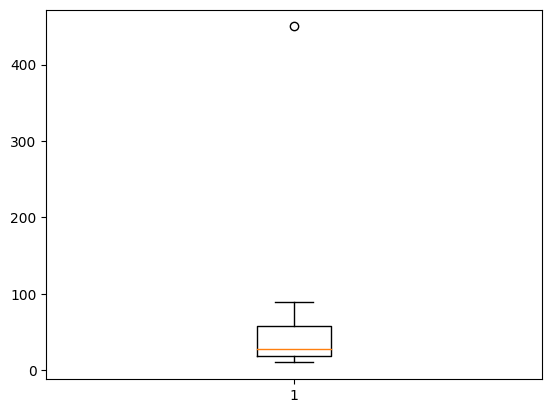

In [ ]:
plt.boxplot(lista_idades)

Linha laranja: mediana  
As bordas da caixa são Q1 e Q3  
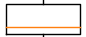  
As linhas acima e abaixo da caixa são os limites superior e inferior  
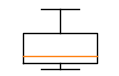  
A bolinha acima é um outlier  
image.png

A ideia dos quartis é dividir dados ordenados em 4 partes, em que:

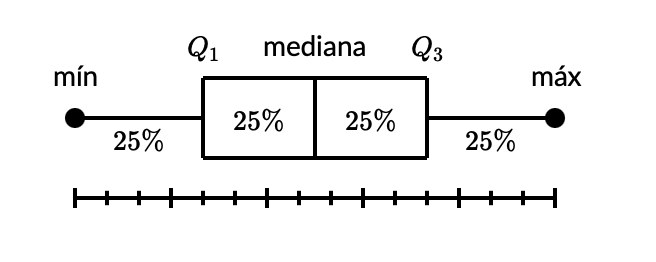

Cada parte representa 1/4 da amostra, sendo assim, o Q1 é inferior ou igual a 25% da amostra, o Q2 ou mediana é inferior ou igual a 50% da amostra, o Q3 é inferior ou igual a 75% da amostra.

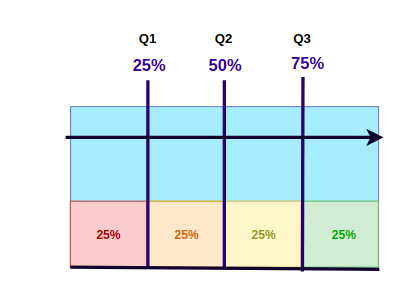

Em outras palavras, são os valores que dividem as partes de um todo.

{'whiskers': [<matplotlib.lines.Line2D at 0x7829d6a966e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7829d6a96b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7829d6a96440>],
 'medians': [<matplotlib.lines.Line2D at 0x7829d6a97040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7829d6a972e0>],
 'means': []}

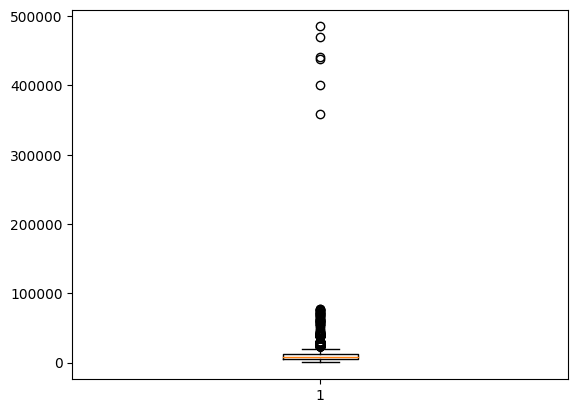

In [ ]:
# testando com a coluna salário do dataframe
plt.boxplot(dados['SALARIO'])

In [ ]:
Q1 = dados['SALARIO'].quantile(0.25) # armazena 1/4 dos dados
Q1

4751.5

In [ ]:
Q3 = dados['SALARIO'].quantile(0.75) # armazena 3/4 dos dados
Q3

11794.5

In [ ]:
# Define o valor entre Q1 e Q3
IQR = Q3 - Q1
IQR

7043.0

In [ ]:
# Limite superior
liSup = Q3 + (1.5 * IQR)
liSup

22359.0

In [ ]:
# Limite inferior
liInf = Q1 - (1.5 * IQR)
liInf

-5813.0

In [ ]:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
media_salario = dados['SALARIO'].mean()
media_salario

10517.53348162023

In [ ]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.21098911858

In [ ]:
limite_superior = media_salario + (3 * desvio_salario)
limite_superior

64806.166448975964

In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
media_30_40 = dados[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']< limite_superior)]['SALARIO'].mean()
media_30_40

39002.19402985075

In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês')&(dados['SALARIO']> limite_superior), 'SALARIO'] = media_30_40

In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
media_40 = dados[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO']< limite_superior)]['SALARIO'].mean()
media_40

53127.846153846156

In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês')&(dados['SALARIO']> limite_superior), 'SALARIO'] = media_40

In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7829d6d35d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7829d6d36290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7829d6d35ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x7829d6d54ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7829d6d36680>],
 'means': []}

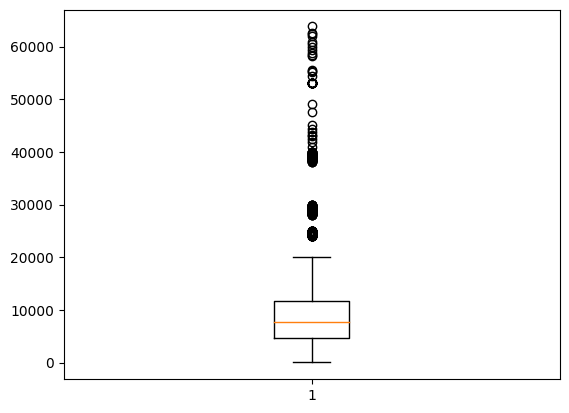

In [ ]:
plt.boxplot(dados['SALARIO'])

### Distribuição amostral e intervalo de confiança

In [ ]:
salarios = dados['SALARIO']

In [ ]:
salarios

,SALARIO
0,11194.0
1,4695.0
2,14202.0
3,15463.0
4,7733.0
...,...
4266,4329.0
4267,3758.0
4268,19607.0
4269,989.0


In [ ]:
media_amostral = np.mean(salarios)
media_amostral

9904.390109813306

In [ ]:
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579352

In [ ]:
nive_confianca = 0.95

In [ ]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
erro_padrao = stats.sem(salarios)
erro_padrao

127.11109872023638

In [ ]:
intervalo_conficanca = stats.t.interval(nive_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)
intervalo_conficanca

(9655.186295869078, 10153.593923757535)

# Aula 4.5 - Featuring Engineering

In [ ]:
def preencher_nivel(gestor, nivel):
  if gestor == 1:
    return 'Gestor'
  else:
    return nivel

In [ ]:
# Aplicando função (usando lambda) para cada linha (apply) na tabela de dados (x)
dados['NOVO NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
dados['NOVO NIVEL'].value_counts()

,count
NOVO NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Gestor,713


In [ ]:
# true ou false nos níveis
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior'],
      dtype='object')

In [ ]:
def determinar_geracao(idade):
  if 39 < idade <= 58:
    return 'GERAÇÃO X'
  elif 29 < idade <= 39:
    return 'MILLENIAL'
  elif 13 < idade <= 29:
    return 'GERAÇÃO Z'
  else:
    return 'OUTRA GERAÇÃO'

In [ ]:
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
GERAÇÃO Z,1999
MILLENIAL,1761
GERAÇÃO X,511


# Nova tabela de dados - aula 4.5 parte 2


In [ ]:
dados2 = pd.read_excel('/content/drive/MyDrive/Programaria - Dados/Planilha_4.5_parte2.xlsx')

In [ ]:
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
dados = dados.merge(dados2, on='ID', how='left')

In [ ]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [ ]:
dados['ABERTO_OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [ ]:
dados['ABERTO_OPORTUNIDADES'].value_counts()

,count
ABERTO_OPORTUNIDADES,
False,2342
True,1354


### Desafio

In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [ ]:
dados['BRANCO'] = dados['COR/RACA/ETNIA'].str.contains('Branca', case=False)
dados['BRANCO'].value_counts()

,count
BRANCO,
True,2746
False,1527


In [ ]:
dados['OUTRA'] = dados['COR/RACA/ETNIA'].str.contains('Outra|Prefiro não informar', case=False)
dados['OUTRA'].value_counts()

,count
OUTRA,
False,4230
True,43


In [ ]:
dados['NAO_BRANCO'] = dados['COR/RACA/ETNIA'].str.contains('Parda|Preta|Amarela|Indígena', case=False)
dados['NAO_BRANCO'].value_counts()

,count
NAO_BRANCO,
False,2789
True,1484


In [ ]:
def etnia(cor):
  if cor == 'Branca':
    return 'Branca'
  elif cor in ['Amarela', 'Indigena', 'Parda', 'Preta']:
    return 'Não Branca'
  elif cor == 'Prefiro não informar':
    return 'Prefiro não informar'
  else:
    return 'Outras etnias'

In [ ]:
dados['ETNIA'] = dados['COR/RACA/ETNIA'].apply(etnia)

In [ ]:
dados['ETNIA'].value_counts()

,count
ETNIA,
Branca,2746
Não Branca,1473
Outras etnias,28
Prefiro não informar,26


# Aula 4.6 - Correlação

A correlação descreve a relação entre variáveis.

In [ ]:
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

0.16055087728932588

* Correlação positiva porém, como 0.29 é próximo de 0, não há uma correlação tão forte entre as variáveis

### Coeficiente de Pearson,

varia de -1 a 1. Um valor próximo de 1 indica uma forte correlação positiva, próximo de -1 indica uma forte correlação negativa, e próximo de 0 indica que não há uma relação linear

### Coeficiente de crammer - variáveis discretas/categóricas
* Indica relação entre 0 e 1, onde 0 indica nenhuma associação entre variáveis e 1 relação máxima entre as variáveis.

importando função para comparar a distribuição da tabela cruzada com a distribuição esperada se as duas variáveis fossem independentes uma da outra. Quanto maior a diferença entre a distribuição observada e esperada, maior será o valor do qui quadrado, o que indica uma associação mais forte entre as variáveis.

In [ ]:
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  # raiz quadrada de chi2/(soma*mini)
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
cramer_coeficiente(dados['GENERO'], dados['NIVEL DE ENSINO'])

0.08522666596077665

In [ ]:
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

0.04499106580480143

In [ ]:
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [ ]:
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

* A tabela cruzada mostra a frequencia de cruzamento dos dados das colunas trabalhadas.

# Salvando o arquivo

* Salvando o arquivo .csv

In [ ]:
dados.to_csv('/content/drive/MyDrive/Programaria - Dados/analise_dados.csv', index=False)

* Salvando o arquivo .xlsx

In [ ]:
dados.to_excel('/content/drive/MyDrive/Programaria - Dados/analise_dados_excel.xlsx', index=False)

# Conectando SQL com pandas

In [ ]:
import sqlite3

In [ ]:
conexao = sqlite3.connect('/content/drive/MyDrive/Programaria - Dados/status_brasil_atualizado')

In [ ]:
query = "SELECT * FROM municipios_brasileiros WHERE cidade = 'São Paulo';"

In [ ]:
query

"SELECT * FROM municipios_brasileiros WHERE cidade = 'São Paulo';"

In [ ]:
pd.read_sql(query, con=conexao)

,cidade,estado,regiao,municipio_ID
0,São Paulo,SP,Sudeste,5341


In [ ]:
dados_atualizado = pd.read_csv('/content/drive/MyDrive/Programaria - Dados/analise_dados.csv')

In [ ]:
dados_atualizado.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
lista_estados = list(dados_atualizado['UF ONDE MORA'].unique())

In [ ]:
query1 = '''
        SELECT municipios_brasileiros.estado, AVG(municipios_status.renda) FROM municipios_brasileiros
        INNER JOIN municipios_status ON municipios_brasileiros.municipio_ID = municipios_status.municipio_ID
        WHERE municipios_brasileiros.estado IN ({}) GROUP BY estado;'''.format(','.join(['?' for _ in lista_estados]))

In [ ]:
estados_renda = pd.read_sql(query1, con=conexao, params=lista_estados)

In [ ]:
estados_renda.rename(columns= {'AVG(municipios_status.renda)': 'renda_correlacao'}, inplace=True)

In [ ]:
dados_atualizado.rename(columns={'UF ONDE MORA': 'estado'}, inplace=True)

In [ ]:
dados_atualizado = dados_atualizado.merge(estados_renda, on='estado', how='left')

In [ ]:
dados_atualizado.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
print(query1)


        SELECT municipios_brasileiros.estado, AVG(municipios_status.renda) FROM municipios_brasileiros
        INNER JOIN municipios_status ON municipios_brasileiros.municipio_ID = municipios_status.municipio_ID
        WHERE municipios_brasileiros.estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?) GROUP BY estado;


In [ ]:
correlacao_renda_salario = dados_atualizado['SALARIO'].corr(dados_atualizado['renda_correlacao'])
correlacao_renda_salario

0.07248666687783062

In [ ]:
query2 = '''
        SELECT municipios_brasileiros.estado, AVG(municipios_status.educacao) FROM municipios_brasileiros
        INNER JOIN municipios_status ON municipios_brasileiros.municipio_ID = municipios_status.municipio_ID
        WHERE municipios_brasileiros.estado IN ({}) GROUP BY estado;'''.format(','.join(['?' for _ in lista_estados]))

In [ ]:
query2

'\n        SELECT municipios_brasileiros.estado, AVG(municipios_status.educacao) FROM municipios_brasileiros\n        INNER JOIN municipios_status ON municipios_brasileiros.municipio_ID = municipios_status.municipio_ID\n        WHERE municipios_brasileiros.estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?) GROUP BY estado;'

In [ ]:
estados_educacao = pd.read_sql(query2, con=conexao, params = lista_estados)

In [ ]:
estados_educacao.rename(columns= {'AVG(municipios_status.educacao)': 'estados_correlacao'}, inplace=True)

In [ ]:
dados_atualizado = dados_atualizado.merge(estados_educacao, on='estado', how='left')

In [ ]:
correlacao_renda_educacao = dados_atualizado['SALARIO'].corr(dados_atualizado['estados_correlacao'])
correlacao_renda_educacao

0.08642081418745999

# Aula 6.3 - Visualização de dados


Utilizando o csv dados_atualizado

In [ ]:
dados_atualizado.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,BRANCO,NAO_BRANCO,OUTRA,ETNIA
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,False,True,False,Não Branca
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,False,True,False,Não Branca
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,True,False,False,Branca
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,True,False,False,Branca
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,True,False,False,Branca


In [ ]:
genero_counts = dados_atualizado['GENERO'].value_counts()

## Construindo gráfico com plt bar

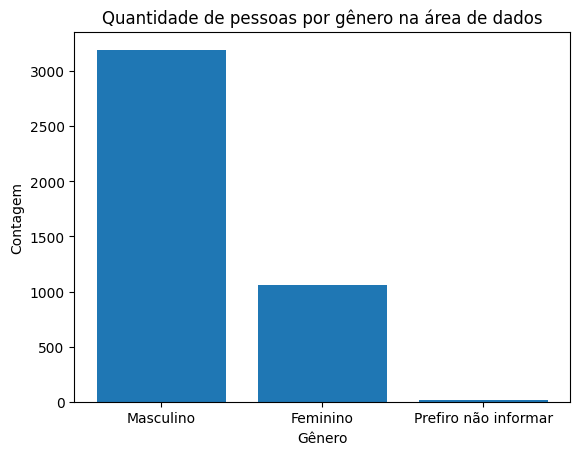

In [ ]:
# Janela do gráfico
plt.figure()

# labels: enviamos as labels os nomes de cada item da coluna genero => x = genero.counts.index()
# height = genero_counts.values: informando o valor da altura das barras que é o valor do value counts
plt.bar(height = genero_counts.values, x = genero_counts.index) # Criando gráfico de barras
plt.title("Quantidade de pessoas por gênero na área de dados") # nome do gráfico
plt.xlabel("Gênero") # nome eixo x
plt.ylabel("Contagem") # nome eixo y
plt.show() # exibir

## Criando gráfico com a biblioteca seaborn

In [ ]:
import seaborn as sns

<ipython-input-142-ae7e2f1d2fd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_atualizado, x='GENERO', palette="pastel")


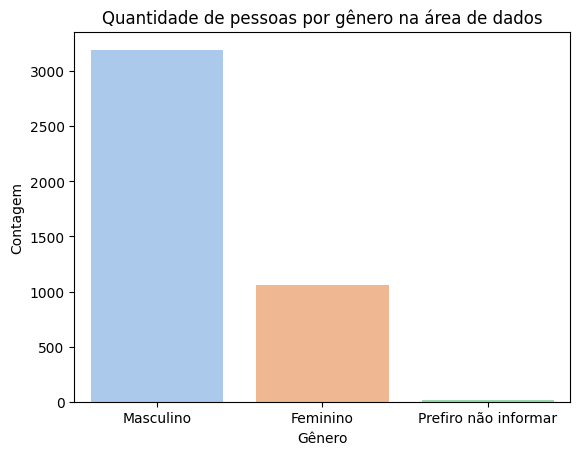

In [ ]:
plt.figure()
sns.countplot(data=dados_atualizado, x='GENERO', palette="pastel")
plt.title("Quantidade de pessoas por gênero na área de dados") # nome do gráfico
plt.xlabel("Gênero") # nome eixo x
plt.ylabel("Contagem") # nome eixo y
plt.show() # exibir

## Relação entre idade e salário com plt plot

In [ ]:
salario_por_idade = dados_atualizado.groupby('IDADE')['SALARIO'].mean()

In [ ]:
salario_por_idade

,SALARIO
IDADE,
18.000000,1320.142857
19.000000,3354.875000
20.000000,3072.842105
20.205479,1491.250000
21.000000,3729.639344
22.000000,3791.131868
23.000000,5278.712000
24.000000,5885.259036
25.000000,7614.970464


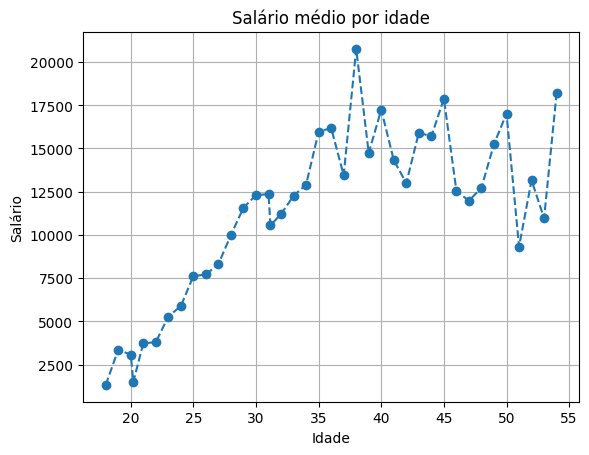

In [ ]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker='o', linestyle='--')
plt.title("Salário médio por idade")
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.grid(True)
plt.show()

## Usando plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO',title='Salário médio por idade', markers=True)
fig.show()

## Usando o scatter com o plt e plotly

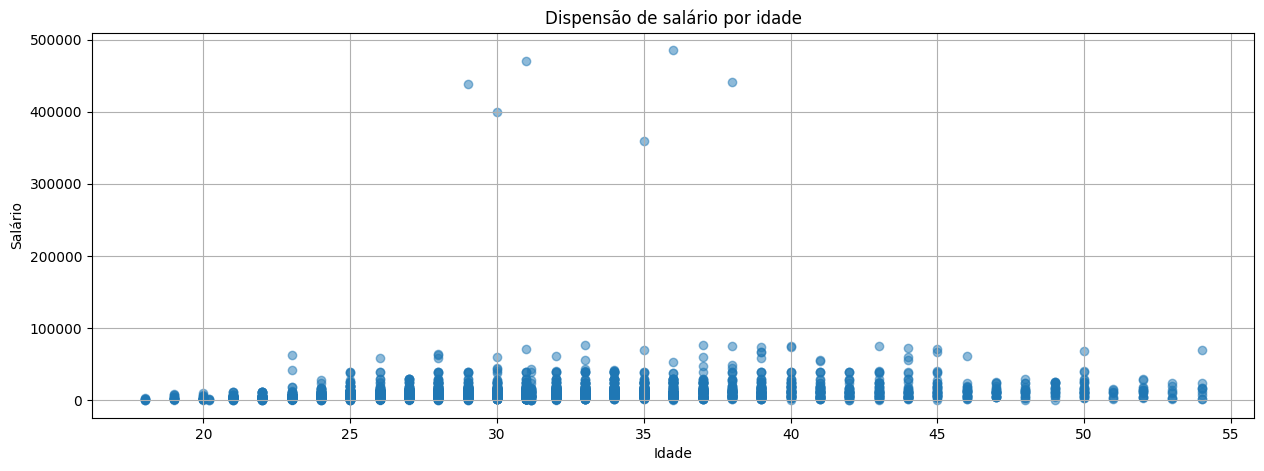

In [ ]:
plt.figure(figsize=(15,5))
# parametro alfa: define a transparência dos pontos do gráfico
plt.scatter(dados_atualizado['IDADE'],dados_atualizado['SALARIO'], alpha=0.5)
plt.title("Dispensão de salário por idade")
plt.grid(True)
plt.xlabel("Idade")
plt.ylabel("Salário")
plt.show()

In [ ]:
fig2 = px.scatter(dados_atualizado, x='IDADE', y='SALARIO', title='Dispensão de salário por idade')
fig2.show()

# Atividade módulo 06

In [ ]:
dados_municipios = pd.read_csv('/content/drive/MyDrive/Programaria - Dados/municipios_brasileiros.csv')

<ipython-input-176-ee0d74fff89a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




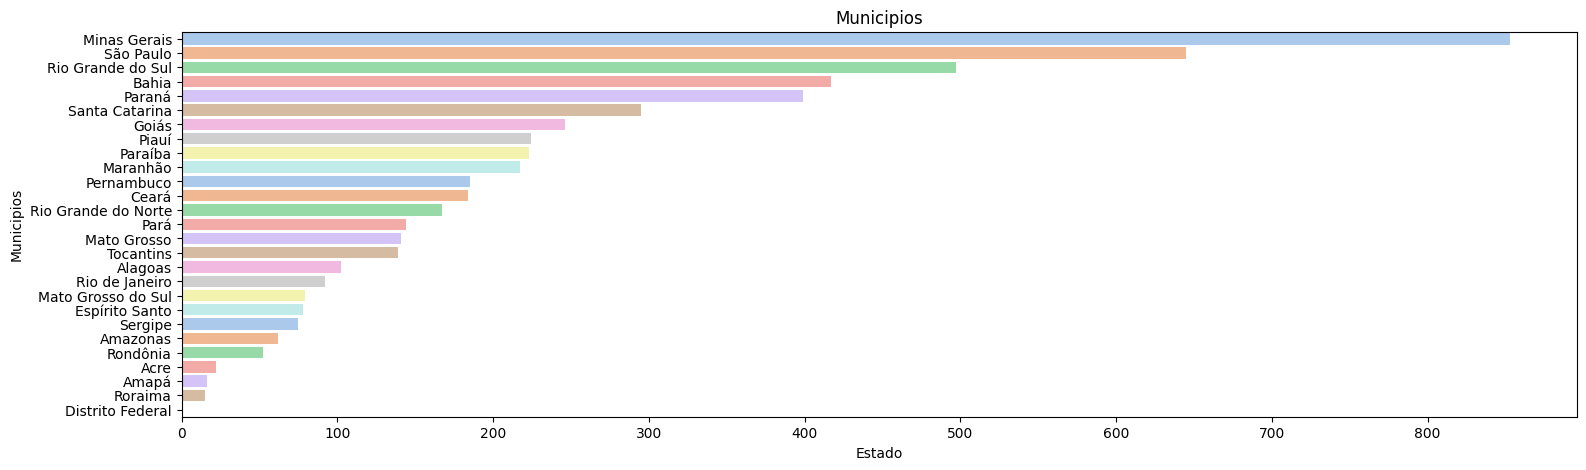

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data=dados_municipios, order=dados_municipios['estado'].value_counts().index, y='estado', palette="pastel")
plt.title("Municipios") # nome do gráfico
plt.xlabel("Estado") # nome eixo x
plt.ylabel("Municipios") # nome eixo y
plt.show() # exibir

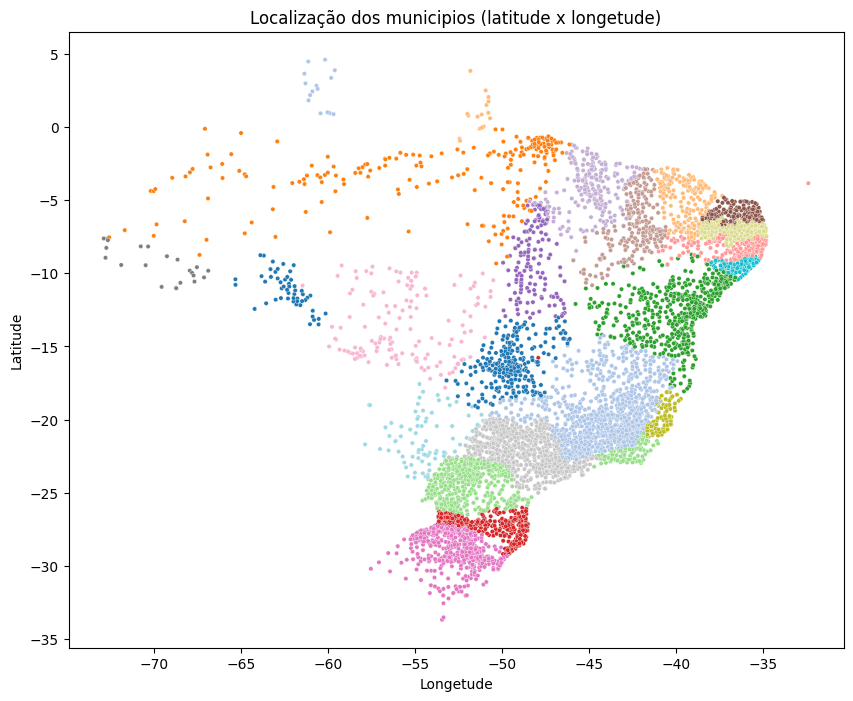

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='uf', data=dados_municipios, legend=None, palette="tab20", s=10)
plt.title("Localização dos municipios (latitude x longetude)") # nome do gráfico
plt.xlabel("Longetude") # nome eixo x
plt.ylabel("Latitude") # nome eixo y
plt.show() # exibir

In [ ]:
dados_municipios.columns


Index(['codigo_ibge', 'nome_municipio', 'codigo_uf', 'uf', 'estado', 'capital',
       'latitude', 'longitude'],
      dtype='object')

# Colab - Machine Learning
https://colab.research.google.com/drive/1INbNDLJz55gcXLkcwoQsujSembHADtyc?usp=sharing